In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
import tensorflow_probability as tfp
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/datasets/CropLand Data/data.zip"

with ZipFile(file_name, 'r') as zip:
	zip.extractall('/content/drive/MyDrive/datasets/CropLand Data')
print('Done!')

Done!


In [3]:
os.listdir('/content/drive/MyDrive/datasets/CropLand Data')

['data.zip',
 'WinnipegDataset.txt',
 'train_embedding.csv',
 'test_embedding.csv']

In [4]:
data=pd.read_csv('/content/drive/MyDrive/datasets/CropLand Data/WinnipegDataset.txt',sep=',')
data=shuffle(data)
data.reset_index(inplace=True)
data.drop(columns=['index'],inplace=True)

## 1-Corn; 2-Peas; 3- Canola; 4-Soybeans; 5- Oats; 6-Wheat; and 7-Broadleaf

f1 to f49:Polarimetric features on 05 July-2012 --
f50 to f98:Polarimetric features on 14 July-2012 --
f99 to f136:Optical features on 05 July 2012 --
f137 to f174:Optical features on 14 July 2012 -- 


In [5]:
data['label']=data['label'].map({1:'Corn',2:'Peas',3:'Canola',4:'Soybeans',5:'Oats',6:'Wheat',7:'Broadleaf'})

In [6]:
data.head(5)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,Canola,-12.7890,-22.438,-13.9410,-17.035,-12.3510,-16.842,1.1527,-9.6492,-8.4965,...,0.35802,0.47809,3.8889,0.098765,0.94444,0.11111,0.11111,0.34883,0.80247,1.00000
1,Soybeans,-17.0950,-25.693,-15.0040,-18.391,-16.2600,-18.051,-2.0915,-8.5975,-10.6890,...,0.23457,0.84163,1.0000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
2,Canola,-9.9429,-19.486,-12.9200,-14.964,-9.9947,-15.000,2.9774,-9.5432,-6.5658,...,1.00000,1.00000,4.0000,0.000000,0.94444,0.11111,0.11111,0.34883,0.80247,1.00000
3,Corn,-9.2724,-17.460,-7.5293,-10.554,-8.8289,-10.276,-1.7431,-8.1873,-9.9304,...,0.65432,1.00000,0.0000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.00000
4,Oats,-15.8730,-24.965,-16.4510,-21.233,-14.6480,-20.058,0.5783,-9.0923,-8.5140,...,1.00000,1.00000,1.8889,0.098765,0.94444,0.11111,0.11111,0.68374,0.62963,0.66144


In [7]:
data.shape

(325834, 175)

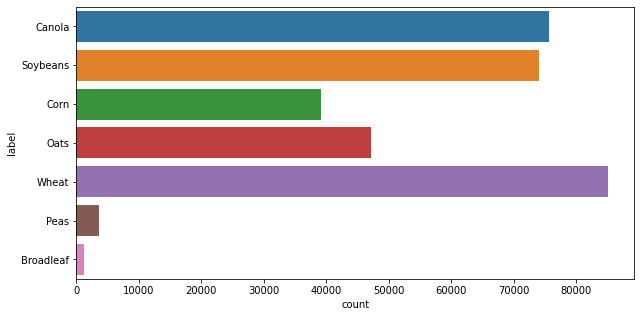

In [8]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(y ='label', data = data)
plt.show() 
  

In [9]:
data['label'].value_counts()

Wheat        85074
Canola       75673
Soybeans     74067
Oats         47117
Corn         39162
Peas          3598
Broadleaf     1143
Name: label, dtype: int64

In [10]:
group=data.groupby('label').agg('mean')
group

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
label,,,,,,,,,,,,,,,,,,,,,
Broadleaf,-7.893540,-14.378217,-9.086348,-11.226837,-7.637949,-11.267333,1.192807,-6.484678,-5.291869,0.040504,...,0.198384,0.209938,1.785940,0.525430,0.814012,1.151355,0.473218,0.776117,0.580808,0.435720
Canola,-11.579386,-20.406500,-13.593847,-15.709752,-11.734300,-15.488163,2.014464,-8.827115,-6.812652,-0.221587,...,0.435474,0.310342,3.564629,0.073831,0.920734,0.162824,0.159238,0.399107,0.766081,0.658891
Corn,-10.654159,-18.589247,-9.477791,-12.549543,-9.865448,-12.535681,-1.176368,-7.935090,-9.111457,-0.013861,...,0.467171,0.349138,0.557632,0.083108,0.924349,0.173802,0.154815,0.375739,0.783157,0.708955
Oats,-16.092220,-25.236124,-16.812602,-20.512555,-15.107698,-20.697957,0.720380,-9.143906,-8.423525,0.185404,...,0.472972,0.341612,1.762320,0.072313,0.929170,0.155869,0.143913,0.360660,0.789121,0.707290
Peas,-10.349832,-15.739691,-10.183898,-13.463276,-9.099174,-13.280044,-0.165929,-5.389865,-5.555794,-0.183232,...,0.303907,0.310473,1.974000,0.074630,0.924010,0.170804,0.155116,0.361776,0.792052,0.687443
Soybeans,-18.670933,-27.878432,-17.366382,-21.313405,-17.550280,-20.847517,-1.304553,-9.207496,-10.512050,-0.465889,...,0.318238,0.310621,1.795566,0.071548,0.926289,0.156740,0.148955,0.367894,0.785520,0.697064
Wheat,-17.084387,-26.204223,-17.543967,-20.827156,-16.396910,-20.703074,0.459582,-9.119836,-8.660254,-0.124081,...,0.504651,0.348053,2.241435,0.090445,0.906528,0.197815,0.188696,0.470861,0.724431,0.610827


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [12]:
labels=pd.DataFrame(LabelEncoder().fit_transform(data['label']))
labels.columns=['Encoded']
labels.head()

,Encoded
0,1
1,5
2,1
3,2
4,3


In [13]:
enc=OneHotEncoder()
u=enc.fit_transform(np.array(data['label']).reshape(-1,1)).toarray()
labels[[ i.split('_')[1] for i in enc.get_feature_names()]]=u
labels.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Encoded,Broadleaf,Canola,Corn,Oats,Peas,Soybeans,Wheat
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
cols=data.drop(columns=['label']).columns
data[cols]=StandardScaler().fit_transform(data[cols])

In [15]:
data.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,Canola,0.671928,0.391701,0.446481,0.419986,0.671830,0.431296,0.532840,-0.636828,0.064665,...,-0.308366,0.337109,1.337112,0.101992,0.234407,-0.169474,-0.233281,-0.113422,0.138121,0.705414
1,Soybeans,-0.556866,-0.411169,0.121191,0.054647,-0.553943,0.102382,-1.395869,0.236649,-1.030132,...,-0.810488,1.159584,-0.911669,-0.438806,0.758789,-0.466777,-0.733758,-0.839938,0.859437,0.705414
2,Canola,1.484113,1.119833,0.758919,0.977963,1.410712,0.932420,1.617642,-0.548791,1.028735,...,2.302832,1.517881,1.423595,-0.438806,0.234407,-0.169474,-0.233281,-0.113422,0.138121,0.705414
3,Corn,1.675452,1.619561,2.408534,2.166122,1.776280,2.217605,-1.188742,0.577335,-0.651334,...,0.896808,1.517881,-1.690090,-0.438806,0.758789,-0.466777,-0.733758,-0.839938,0.859437,0.705414
4,Oats,-0.208147,-0.231602,-0.321608,-0.711055,-0.048456,-0.443631,0.191354,-0.174302,0.055927,...,2.302832,1.517881,-0.219730,0.101992,0.234407,-0.169474,-0.233281,0.584103,-0.493035,-0.013002


In [16]:
X=data[cols].values
Y=labels['Encoded'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((260667, 174), (65167, 174), (260667,), (65167,))

In [20]:
pd.Series(y_train).unique()

array([6, 1, 2, 5, 3, 4, 0])

## Architecture Building

In [21]:
model=keras.models.Sequential([
            keras.layers.Input(shape=[174]),
            keras.layers.Dense(256,activation='relu'),
            keras.layers.Dense(128,activation='relu'),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(7,activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                    loss='sparse_categorical_crossentropy',metrics=['Accuracy'])
hist=model.fit(x_train,y_train,epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
8146/8146 [==============================] - 36s 4ms/step - loss: 0.0348 - Accuracy: 0.9894
Epoch 2/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0178 - Accuracy: 0.9943
Epoch 3/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0143 - Accuracy: 0.9956
Epoch 4/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0115 - Accuracy: 0.9965
Epoch 5/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0105 - Accuracy: 0.9969
Epoch 6/20
8146/8146 [==============================] - 22s 3ms/step - loss: 0.0104 - Accuracy: 0.9971
Epoch 7/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0086 - Accuracy: 0.9974
Epoch 8/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0096 - Accuracy: 0.9976
Epoch 9/20
8146/8146 [==============================] - 21s 3ms/step - loss: 0.0095 - Accuracy: 0.9977
Epoch 10/20
8146/8146 [==============================] - 21s 3ms/step - l

In [22]:
model.save('Simple_Neural_Network.h5')

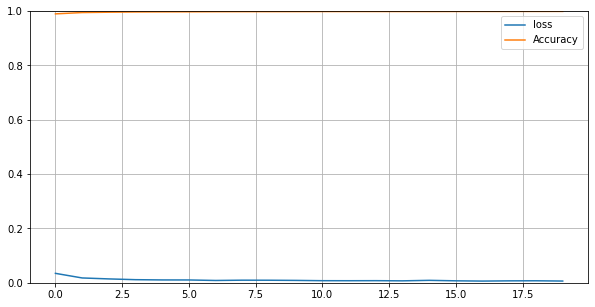

In [23]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()


In [24]:
preds=model.predict(x_test)

In [25]:
preds=np.argmax(preds, axis=1)

In [26]:
y_test.shape,preds.shape

((65167,), (65167,))

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       236
           1       1.00      1.00      1.00     14942
           2       1.00      1.00      1.00      7783
           3       0.99      0.99      0.99      9510
           4       1.00      1.00      1.00       733
           5       1.00      1.00      1.00     14811
           6       1.00      1.00      1.00     17152

    accuracy                           1.00     65167
   macro avg       0.99      1.00      0.99     65167
weighted avg       1.00      1.00      1.00     65167



In [28]:
model.evaluate(x_test,y_test)

2037/2037 [==============================] - 5s 2ms/step - loss: 0.0150 - Accuracy: 0.9974


[0.015048381872475147, 0.9973606467247009]

## Latent Space Clustering 

In [30]:
Encoder=keras.models.Sequential([
            keras.layers.Input(shape=x_train.shape[1]),
            keras.layers.Dense(256,activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(128,activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(2)
])
Decoder=keras.models.Sequential([
            keras.layers.Input(shape=[2]),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(128,activation='relu'),
            keras.layers.Dense(256,activation='relu'),
            keras.layers.Dense(x_train.shape[1])
])
AutoEncoder=keras.models.Model([Encoder.input],[Decoder(Encoder.output)])
AutoEncoder.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                    loss='mse',metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


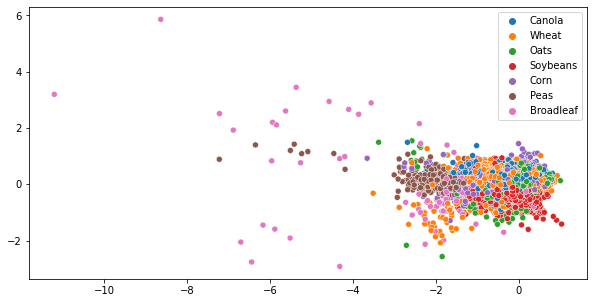

In [31]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
Encoding=Encoder.predict(x_test)
class_names=np.array([ i.split('_')[1] for i in enc.get_feature_names()])
sns.scatterplot(Encoding[:,0],Encoding[:,1],hue=class_names[y_test])
plt.show()

In [32]:
hist=AutoEncoder.fit(x_train,x_train,epochs=20)

Epoch 1/20
8146/8146 [==============================] - 37s 4ms/step - loss: 0.3376 - mae: 0.3707
Epoch 2/20
8146/8146 [==============================] - 36s 4ms/step - loss: 0.2820 - mae: 0.3312
Epoch 3/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2669 - mae: 0.3196
Epoch 4/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2588 - mae: 0.3139
Epoch 5/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2530 - mae: 0.3097
Epoch 6/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2505 - mae: 0.3077
Epoch 7/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2443 - mae: 0.3041
Epoch 8/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2434 - mae: 0.3021
Epoch 9/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2454 - mae: 0.3038
Epoch 10/20
8146/8146 [==============================] - 35s 4ms/step - loss: 0.2407 - mae: 0.3024
Epoch 11/20
8146/81

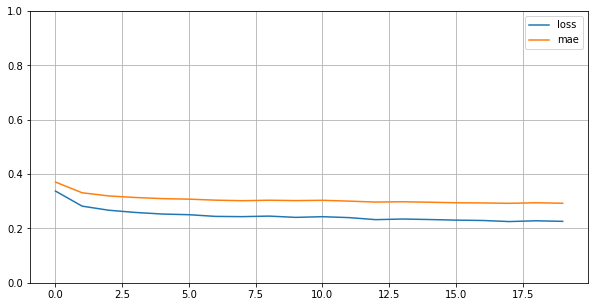

In [33]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


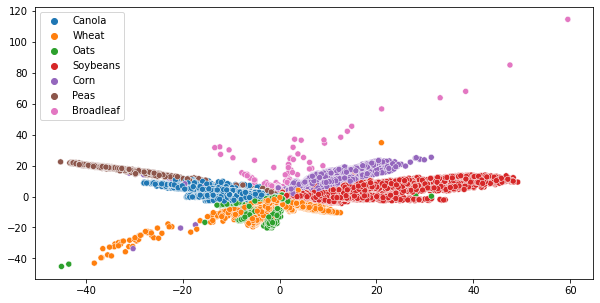

In [34]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
Encoding=Encoder.predict(x_test)
class_names=np.array([ i.split('_')[1] for i in enc.get_feature_names()])
sns.scatterplot(Encoding[:,0],Encoding[:,1],hue=class_names[y_test])
plt.show()

Optional Latent Space Embedding (if someone use)

In [53]:
x_train_embeddidng=Encoder(x_train)
x_test_embeddidng=Encoder(x_test)
train_embedding=pd.DataFrame({'embedding_a':x_train_embeddidng[:,0],
                              'embedding_b':x_train_embeddidng[:,1]})
test_embedding=pd.DataFrame({'embedding_a':x_test_embeddidng[:,0],
                              'embedding_b':x_test_embeddidng[:,1]})
train_embedding.to_csv('/content/drive/MyDrive/datasets/CropLand Data/train_embedding.csv')
test_embedding.to_csv('/content/drive/MyDrive/datasets/CropLand Data/test_embedding.csv')

-----------------------------------------------------

## Classification Model

In [35]:
X=data[cols].values
Y=labels[['Broadleaf','Canola','Corn','Oats','Peas','Soybeans','Wheat']].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((260667, 174), (65167, 174), (260667, 7), (65167, 7))

In [37]:
x_train_1,x_test_1=x_train[:,1:50],x_test[:,1:50]
x_train_2,x_test_2=x_train[:,50:99],x_test[:,50:99]
x_train_3,x_test_3=x_train[:,99:137],x_test[:,99:137]
x_train_4,x_test_4=x_train[:,137:],x_test[:,137:]
y_train_1,y_test_1=y_train[:,0],y_test[:,0]
y_train_2,y_test_2=y_train[:,1],y_test[:,1]
y_train_3,y_test_3=y_train[:,2],y_test[:,2]
y_train_4,y_test_4=y_train[:,3],y_test[:,3]
y_train_5,y_test_5=y_train[:,4],y_test[:,4]
y_train_6,y_test_6=y_train[:,5],y_test[:,5]
y_train_7,y_test_7=y_train[:,6],y_test[:,6]
x_train_1.shape,x_train_2.shape,x_train_3.shape,x_train_4.shape

((260667, 49), (260667, 49), (260667, 38), (260667, 37))

In [38]:
input_1=keras.layers.Input(shape=[49])
input_2=keras.layers.Input(shape=[49])
input_3=keras.layers.Input(shape=[38])
input_4=keras.layers.Input(shape=[37])

dense_1_1=keras.layers.Dense(256,activation='relu')(input_1)
bn_1_1=keras.layers.BatchNormalization()(dense_1_1)
dense_1_2=keras.layers.Dense(128,activation='relu')(bn_1_1)
conat_1_1=keras.layers.concatenate([input_1,dense_1_2])
dense_1_3=keras.layers.Dense(64,activation='relu')(conat_1_1)
bn_1_2=keras.layers.BatchNormalization()(dense_1_3)
dense_1_4=keras.layers.Dense(32,activation='relu')(bn_1_2)

dense_2_1=keras.layers.Dense(256,activation='relu')(input_2)
bn_2_1=keras.layers.BatchNormalization()(dense_2_1)
dense_2_2=keras.layers.Dense(128,activation='relu')(bn_2_1)
conat_2_1=keras.layers.concatenate([input_2,dense_2_2])
dense_2_3=keras.layers.Dense(64,activation='relu')(conat_2_1)
bn_2_2=keras.layers.BatchNormalization()(dense_2_3)
dense_2_4=keras.layers.Dense(32,activation='relu')(bn_2_2)

dense_3_1=keras.layers.Dense(256,activation='relu')(input_3)
bn_3_1=keras.layers.BatchNormalization()(dense_3_1)
dense_3_2=keras.layers.Dense(128,activation='relu')(bn_3_1)
conat_3_1=keras.layers.concatenate([input_3,dense_3_2])
dense_3_3=keras.layers.Dense(64,activation='relu')(conat_3_1)
bn_3_2=keras.layers.BatchNormalization()(dense_3_3)
dense_3_4=keras.layers.Dense(32,activation='relu')(bn_3_2)

dense_4_1=keras.layers.Dense(256,activation='relu')(input_4)
bn_4_1=keras.layers.BatchNormalization()(dense_4_1)
dense_4_2=keras.layers.Dense(128,activation='relu')(bn_4_1)
conat_4_1=keras.layers.concatenate([input_4,dense_4_2])
dense_4_3=keras.layers.Dense(64,activation='relu')(conat_4_1)
bn_4_2=keras.layers.BatchNormalization()(dense_4_3)
dense_4_4=keras.layers.Dense(32,activation='relu')(bn_4_2)

CONCAT=keras.layers.concatenate([dense_1_4,dense_2_4,dense_3_4,dense_4_4])
dense_1=keras.layers.Dense(256,activation='relu')(CONCAT)
dense_2=keras.layers.Dense(128,activation='relu')(dense_1)
dense_3=keras.layers.Dense(64,activation='relu')(dense_2)
output_1=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_2=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_3=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_4=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_5=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_6=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))
output_7=keras.layers.Dense(1,activation='sigmoid')(keras.layers.Dense(8,
                                                                activation='relu')(dense_3))


In [39]:
Classifier=keras.models.Model([input_1,input_2,input_3,input_4],[output_1,output_2,
                                          output_3,output_4,output_5,output_6,output_7])

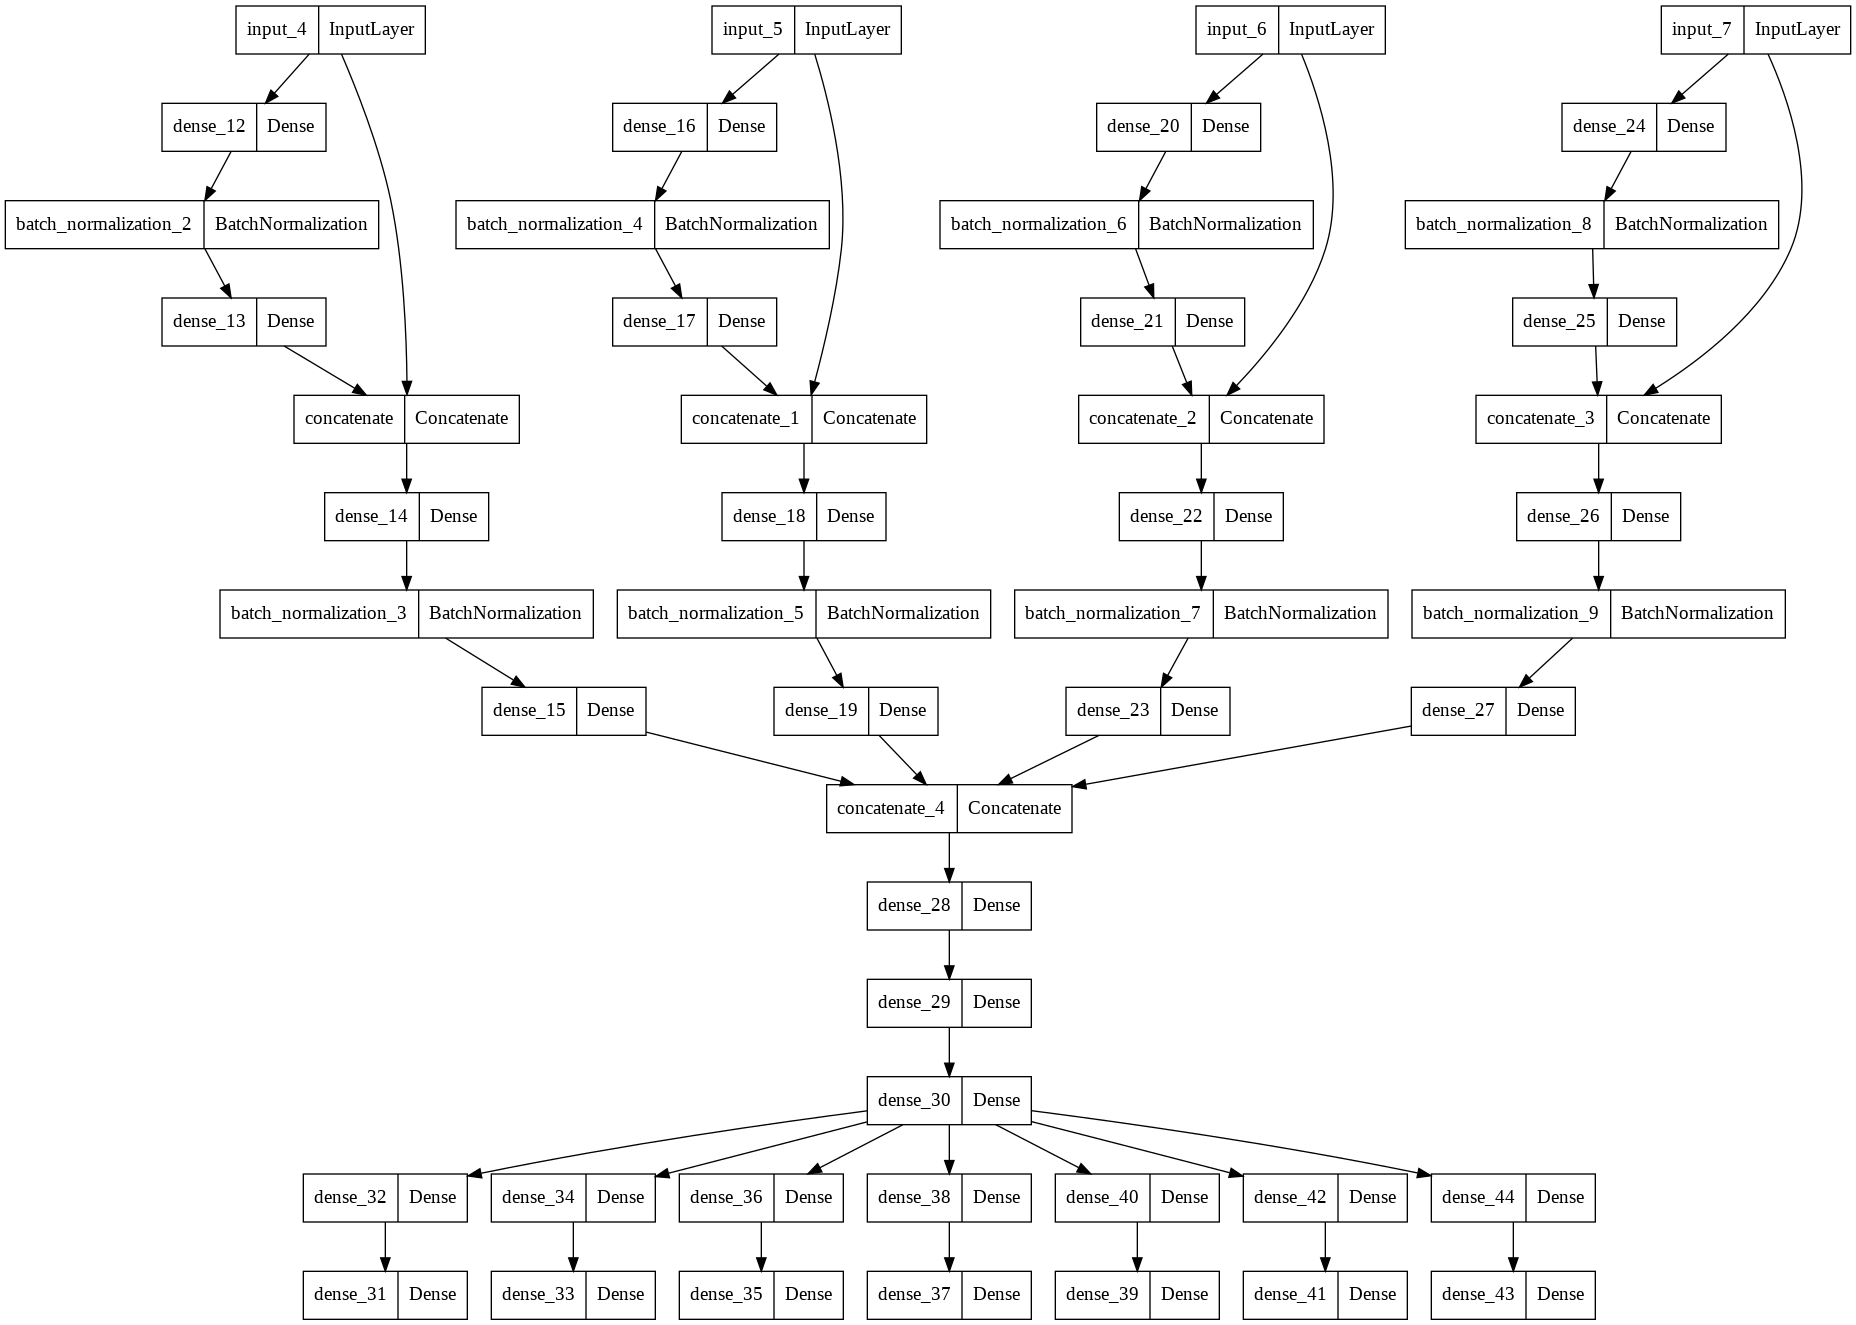

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(Classifier,to_file='Directed_Acyclic_Graph_Network_1.png')

In [42]:
Classifier.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                   loss='binary_crossentropy',
                   metrics='Accuracy')
hist=Classifier.fit([x_train_1,x_train_2,x_train_3,x_train_4],
         [y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,y_train_7],
         epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
8146/8146 [==============================] - 143s 17ms/step - loss: 0.0969 - dense_31_loss: 0.0032 - dense_33_loss: 0.0087 - dense_35_loss: 0.0116 - dense_37_loss: 0.0261 - dense_39_loss: 0.0061 - dense_41_loss: 0.0149 - dense_43_loss: 0.0262 - dense_31_Accuracy: 0.9990 - dense_33_Accuracy: 0.9973 - dense_35_Accuracy: 0.9964 - dense_37_Accuracy: 0.9908 - dense_39_Accuracy: 0.9991 - dense_41_Accuracy: 0.9952 - dense_43_Accuracy: 0.9904
Epoch 2/5
8146/8146 [==============================] - 129s 16ms/step - loss: 0.0532 - dense_31_loss: 0.0017 - dense_33_loss: 0.0050 - dense_35_loss: 0.0059 - dense_37_loss: 0.0151 - dense_39_loss: 0.0018 - dense_41_loss: 0.0088 - dense_43_loss: 0.0149 - dense_31_Accuracy: 0.9995 - dense_33_Accuracy: 0.9985 - dense_35_Accuracy: 0.9983 - dense_37_Accuracy: 0.9948 - dense_39_Accuracy: 0.9998 - dense_41_Accuracy: 0.9971 - dense_43_Accuracy: 0.9948
Epoch 3/5
8146/8146 [==============================] - 126s 15ms/step - loss: 0.0427 - dense_31_loss: 

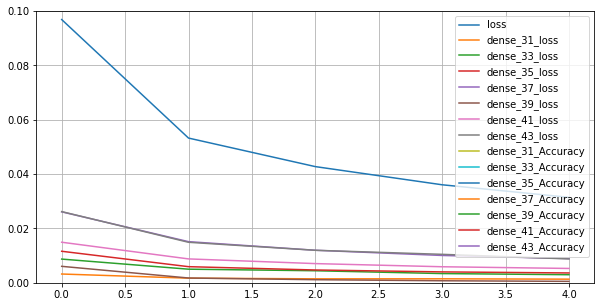

In [43]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,0.1)
plt.show()

In [ ]:
Classifier.evaluate([x_test_1,x_test_2,x_test_3,x_test_4],
         [y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,y_test_7])

1779/2037 [=========================>....] - ETA: 1s - loss: 0.0214 - dense_31_loss: 0.0013 - dense_33_loss: 0.0021 - dense_35_loss: 0.0029 - dense_37_loss: 0.0052 - dense_39_loss: 7.2846e-05 - dense_41_loss: 0.0043 - dense_43_loss: 0.0055 - dense_31_Accuracy: 0.9996 - dense_33_Accuracy: 0.9993 - dense_35_Accuracy: 0.9991 - dense_37_Accuracy: 0.9981 - dense_39_Accuracy: 1.0000 - dense_41_Accuracy: 0.9988 - dense_43_Accuracy: 0.9983

In [ ]:
preds=Classifier.predict([x_test_1,x_test_2,x_test_3,x_test_4])
np.array(preds).shape

In [ ]:
preds

In [ ]:
preds_=np.array(preds).reshape(65167,7)
preds_

In [ ]:
preds__=np.argmax(preds,axis=0)
preds__

In [ ]:
preds___=preds__.reshape(y_test.shape[0],)

In [ ]:
actual=np.argmax(y_test, axis=1)
actual

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual,preds___))

In [52]:
Classifier.save('Directed_Acyclic_Graph_Neural_Network_1.h5')

## Second Model

Optional Latent Embedding (If Someone want to use in Network)

In [60]:
tr_emb=pd.read_csv('/content/drive/MyDrive/datasets/CropLand Data/train_embedding.csv').values
te_emb=pd.read_csv('/content/drive/MyDrive/datasets/CropLand Data/test_embedding.csv').values

-------------------------------------------------

In [54]:
input_1=keras.layers.Input(shape=[49])
input_2=keras.layers.Input(shape=[49])
input_3=keras.layers.Input(shape=[38])
input_4=keras.layers.Input(shape=[37])
input_5=keras.layers.Input(shape=[2])
dense_1_1=keras.layers.Dense(128,activation='relu')(input_1)
bn_1_1=keras.layers.BatchNormalization()(dense_1_1)
conat_1_1=keras.layers.concatenate([input_1,bn_1_1])
dense_1_3=keras.layers.Dense(64,activation='relu')(conat_1_1)
bn_1_2=keras.layers.BatchNormalization()(dense_1_3)
conat_1_2=keras.layers.concatenate([input_1,bn_1_2])
dense_1_4=keras.layers.Dense(32,activation='relu')(conat_1_2)

dense_2_1=keras.layers.Dense(128,activation='relu')(input_2)
bn_2_1=keras.layers.BatchNormalization()(dense_2_1)
conat_2_1=keras.layers.concatenate([input_2,bn_2_1])
dense_2_3=keras.layers.Dense(64,activation='relu')(conat_2_1)
bn_2_2=keras.layers.BatchNormalization()(dense_2_3)
conat_2_2=keras.layers.concatenate([input_2,bn_2_2])
dense_2_4=keras.layers.Dense(32,activation='relu')(conat_2_2)

dense_3_1=keras.layers.Dense(128,activation='relu')(input_3)
bn_3_1=keras.layers.BatchNormalization()(dense_3_1)
conat_3_1=keras.layers.concatenate([input_3,bn_3_1])
dense_3_3=keras.layers.Dense(64,activation='relu')(conat_3_1)
bn_3_2=keras.layers.BatchNormalization()(dense_3_3)
conat_3_2=keras.layers.concatenate([input_3,bn_3_2])
dense_3_4=keras.layers.Dense(32,activation='relu')(conat_3_2)

dense_4_1=keras.layers.Dense(128,activation='relu')(input_4)
bn_4_1=keras.layers.BatchNormalization()(dense_4_1)
conat_4_1=keras.layers.concatenate([input_4,bn_4_1])
dense_4_3=keras.layers.Dense(64,activation='relu')(conat_4_1)
bn_4_2=keras.layers.BatchNormalization()(dense_4_3)
conat_4_2=keras.layers.concatenate([input_4,bn_4_2])
dense_4_4=keras.layers.Dense(32,activation='relu')(conat_4_2)

CONCAT=keras.layers.concatenate([dense_1_4,dense_2_4,dense_3_4,dense_4_4])
dense_1=keras.layers.Dense(128,activation='relu')(CONCAT)
dense_2=keras.layers.Dense(64,activation='relu')(dense_1)
output_1=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_2=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_3=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_4=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_5=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_6=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))
output_7=keras.layers.Dense(1,activation='sigmoid')(keras.layers.concatenate([dense_2,input_5]))

Classifier_2=keras.models.Model([input_1,input_2,input_3,input_4,input_5],[output_1,output_2,
                                          output_3,output_4,output_5,output_6,output_7])

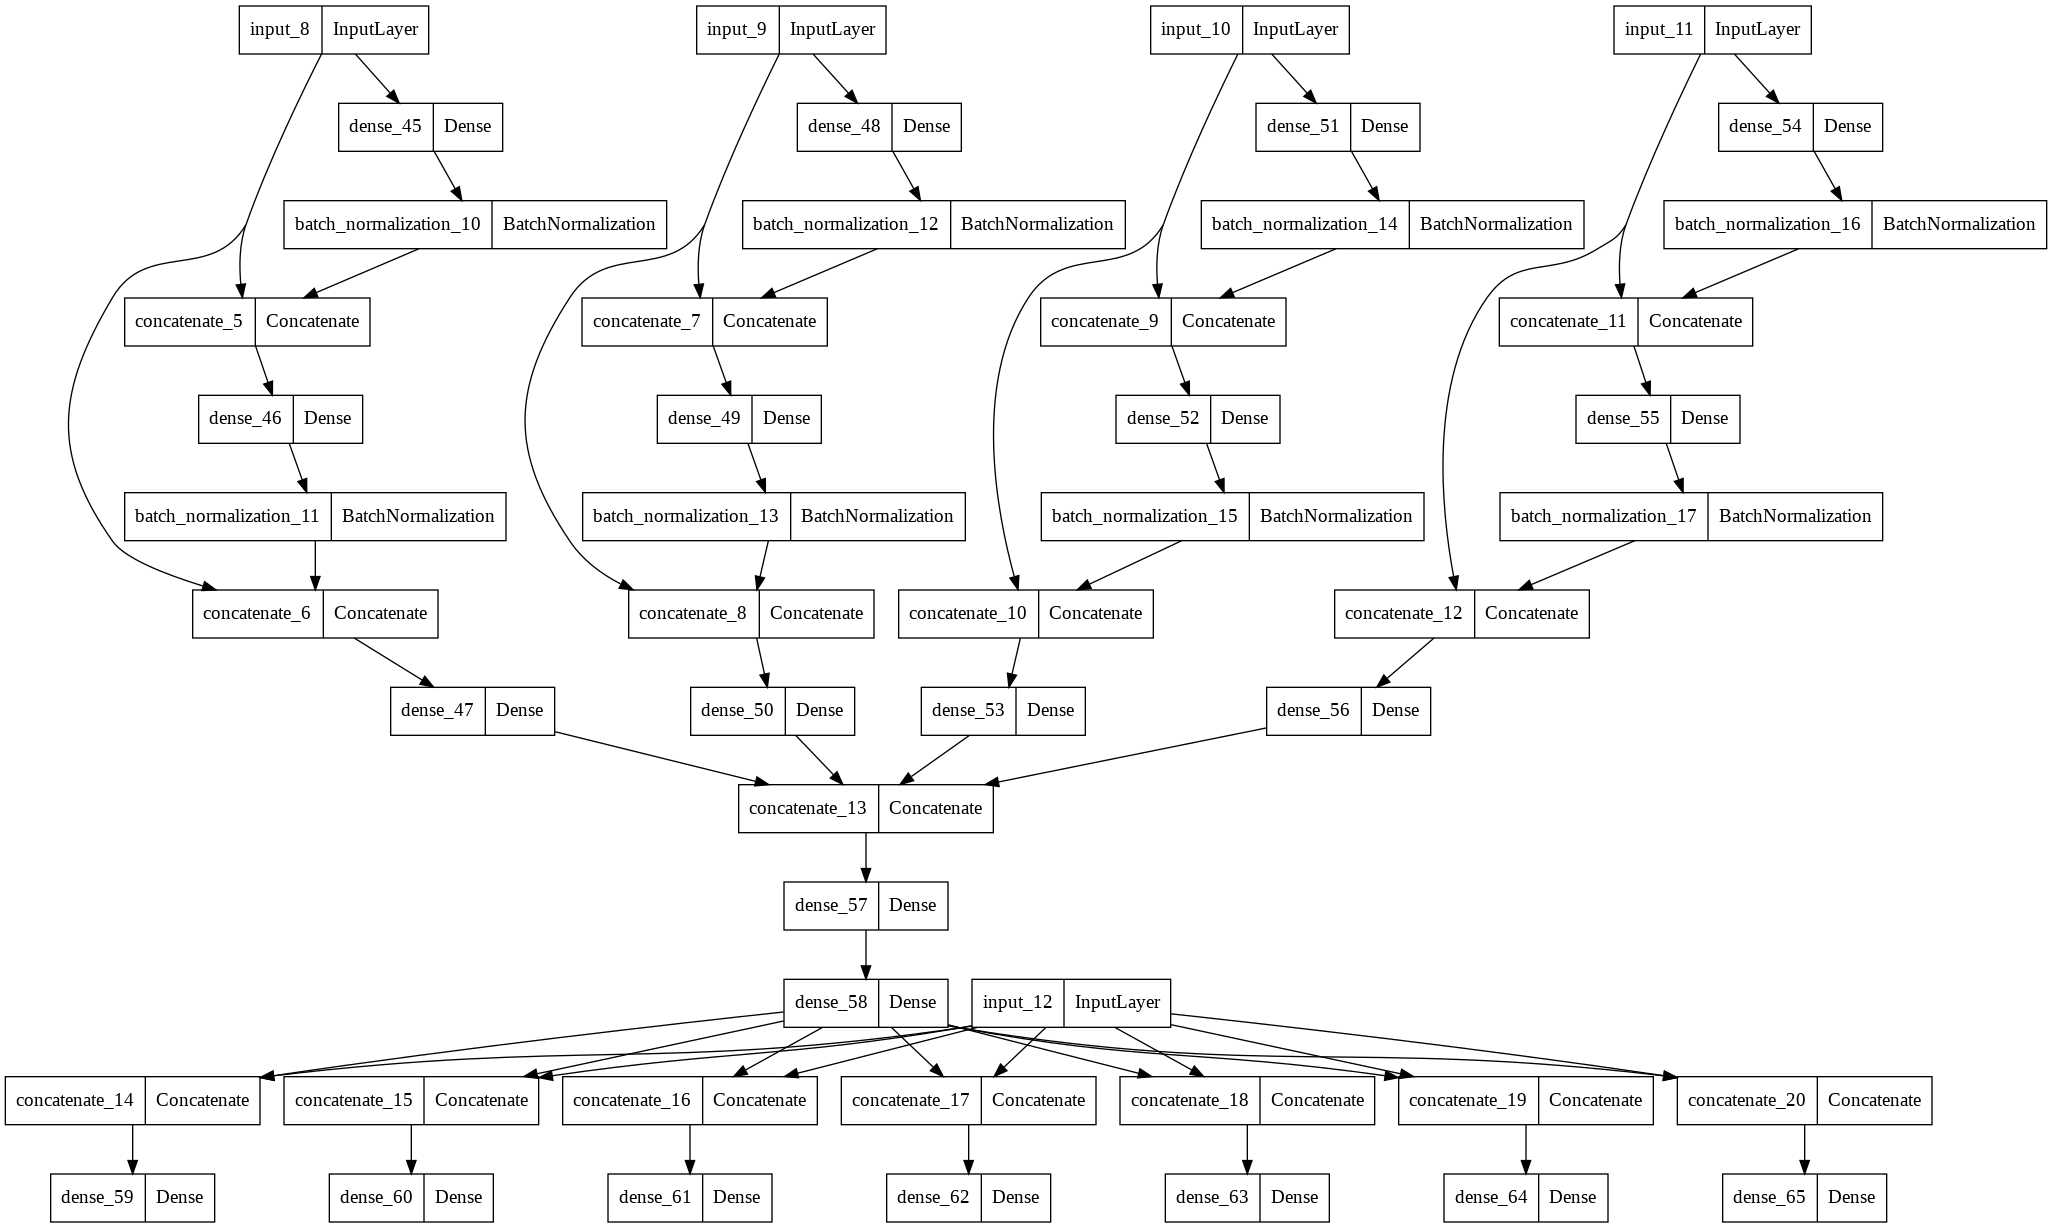

In [56]:
from tensorflow.keras.utils import plot_model
plot_model(Classifier_2,to_file='Directed_Acyclic_Graph_Network_2.png')

In [61]:
Classifier_2.compile(optimizer=keras.optimizers.Adam(lr=0.005),
                   loss='binary_crossentropy',
                   metrics='Accuracy')
hist=Classifier_2.fit([x_train_1,x_train_2,x_train_3,x_train_4,tr_emb[:,1:]],
         [y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,y_train_7],
         epochs=5)

Epoch 1/5
8146/8146 [==============================] - 124s 15ms/step - loss: 0.0939 - dense_59_loss: 0.0042 - dense_60_loss: 0.0092 - dense_61_loss: 0.0120 - dense_62_loss: 0.0257 - dense_63_loss: 0.0032 - dense_64_loss: 0.0146 - dense_65_loss: 0.0250 - dense_59_Accuracy: 0.9989 - dense_60_Accuracy: 0.9976 - dense_61_Accuracy: 0.9968 - dense_62_Accuracy: 0.9913 - dense_63_Accuracy: 0.9993 - dense_64_Accuracy: 0.9956 - dense_65_Accuracy: 0.9914
Epoch 2/5
8146/8146 [==============================] - 117s 14ms/step - loss: 0.0607 - dense_59_loss: 0.0037 - dense_60_loss: 0.0062 - dense_61_loss: 0.0077 - dense_62_loss: 0.0168 - dense_63_loss: 0.0012 - dense_64_loss: 0.0096 - dense_65_loss: 0.0156 - dense_59_Accuracy: 0.9993 - dense_60_Accuracy: 0.9986 - dense_61_Accuracy: 0.9983 - dense_62_Accuracy: 0.9946 - dense_63_Accuracy: 0.9998 - dense_64_Accuracy: 0.9973 - dense_65_Accuracy: 0.9947
Epoch 3/5
8146/8146 [==============================] - 115s 14ms/step - loss: 0.0496 - dense_59_loss: 

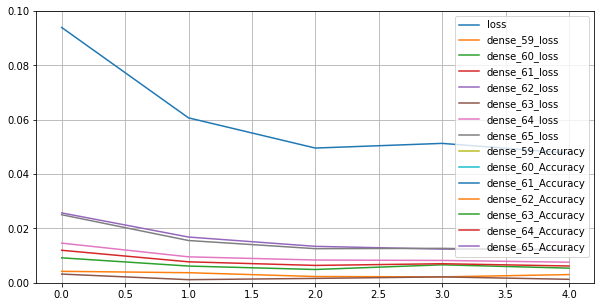

In [65]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,0.1)
plt.show()

In [62]:
Classifier_2.evaluate([x_test_1,x_test_2,x_test_3,x_test_4,te_emb[:,1:]],
         [y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,y_test_7])

2037/2037 [==============================] - 14s 7ms/step - loss: 0.0420 - dense_59_loss: 0.0028 - dense_60_loss: 0.0048 - dense_61_loss: 0.0046 - dense_62_loss: 0.0124 - dense_63_loss: 2.1898e-04 - dense_64_loss: 0.0055 - dense_65_loss: 0.0116 - dense_59_Accuracy: 0.9995 - dense_60_Accuracy: 0.9991 - dense_61_Accuracy: 0.9989 - dense_62_Accuracy: 0.9958 - dense_63_Accuracy: 1.0000 - dense_64_Accuracy: 0.9984 - dense_65_Accuracy: 0.9967


[0.04199700802564621,
 0.002840001368895173,
 0.004841318819671869,
 0.004565155133605003,
 0.012417957186698914,
 0.00021898387058172375,
 0.005488850176334381,
 0.011624719947576523,
 0.999478280544281,
 0.9991406798362732,
 0.9989258646965027,
 0.9958261251449585,
 0.9999693036079407,
 0.9983733892440796,
 0.9967314600944519]

In [63]:
preds_2=Classifier_2.predict([x_test_1,x_test_2,x_test_3,x_test_4,te_emb[:,1:]])
preds__2=np.argmax(preds_2,axis=0)
preds___2=preds__2.reshape(y_test.shape[0],)
actual2=np.argmax(y_test, axis=1)
print(classification_report(actual2,preds___2))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       214
           1       1.00      1.00      1.00     15167
           2       1.00      0.99      1.00      7758
           3       0.98      0.99      0.99      9235
           4       1.00      1.00      1.00       747
           5       1.00      1.00      1.00     14877
           6       1.00      0.99      0.99     17169

    accuracy                           0.99     65167
   macro avg       0.97      0.99      0.98     65167
weighted avg       0.99      0.99      0.99     65167



In [64]:
Classifier_2.save('Directed_Acyclic_Graph_Neural_Network_2.h5')